<a href="https://colab.research.google.com/github/humzah-ah/first-repo/blob/main/Chapter2_PerformanceMeasurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Performance Measurement
* Alpha and Beta
* Risk-Reward Ratios
* Estimating Performance Measures
* Time Horizons and Annualizing Performance Measures
* High Water Mark
* Drawdown
* Adjusting Performance Measures for Illiquidity and Stale Prices
* Performance Attribution
* Backtests and Track Records

# Linear Regression in CAPM
$$
E(R_i-r_f)=\beta\times E(R_M-r_f)
$$
$E$ is expectation, or mean. Let's say:
$$
R_i^e=R_i-r_f\\
R_M^e=R_M-r_f
$$

When you run regression of $R_i^e$ on $R_M^e$:
$$
R_{i,t}^e=\alpha_i+\beta\times R_{M,t}^e+\epsilon_{i,t}
$$
What is $\alpha$, $\beta$, $\epsilon$?

* $\beta$ = market risk, tendency to follow the market
* $\alpha$ = excess return, adjusted for market risk, due to HF trading skills (or luck)
* $\epsilon$ = idiosyncratic risk

What is market neutral?
* Market neutral hedge fund: $\beta=0$
* "market neutral excess return": $R_{i,t}^e-\beta\times R_{M,t}^e=\alpha_i+\epsilon_{i,t}$
* $E(market\,neutral\,excess\,return)=\alpha$

How do we go market neutral?


Why separate $\alpha$ and $\beta$?
* $\beta\times R_{M,t}^e$: can be achieved using index fund
* No need to pay large fees for this (e.g. Vanguard will do it for around 0.1%)
* $\beta$ necessary for risk management:
* If you mix a (long) HF into a portfolio with other market risk, the beta risk will not go away
* How large a fee should investors at most pay?


# More than market risk
Adjusting for more than market risk:
* Three-factor model of Fama and French (1993):
$$
R_i^e=\alpha+\beta_M\times R_M^e+\beta_{SMB}\times R_{SMB}+\beta_{HML}\times R_{HML}+\epsilon
$$
* High minus low (HML): Value strategy based on B/M
* Small minus big (SMB): Size bet based on market capitalization

What does alpha mean here?

Alpha and betas with respect to all your current risk factors are relevant.

# Risk-Reward Ratios
* The reward for investments is:
* expected return, or
* expected abnormal return, i.e., alpha
* Positive reward is good and negative reward is bad
* but is higher expected return always better?
* What about risk?
* Returns/alphas depend on how a strategy is scaled:
* a twice-leveraged strategy has twice the return/alpha of an unleveraged version of the same strategy
* Solution:
* We need to consider reward-to-risk ratios


# Sharpe Ratio
$$
SR=\frac{E(R-r_f)}{\sigma(R-r_f)}
$$

* SR measures the “reward” for taking risk, per unit of risk that you take
* Reward = expected return over the risk-free rate
* Risk = standard deviation of return


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
tass = pd.read_csv('mount/My Drive/Colab Notebooks/TASS.csv', encoding='unicode_escape')
print(tass.head(2))

   IndexReference MonthEndDate      NAV  RateOfReturn              IndexName  \
0               1   2000-01-31  14382.8     -1.757502  ASX All Ordinaries TR   
1               1   2000-02-29  14613.1      1.601218  ASX All Ordinaries TR   

  Abbreviation   StartDate     EndDate  InitialNAV  
0      ASX DRI  1990-08-31  2024-08-31      4804.8  
1      ASX DRI  1990-08-31  2024-08-31      4804.8  


In [ ]:
# select an index
hf = tass[tass.IndexName=='Credit Suisse AllHedge Index USD'].sort_values(['MonthEndDate']).\
     reset_index(drop=True)
print(hf.head(2))

   IndexReference MonthEndDate     NAV  RateOfReturn  \
0            1060   2004-09-30  100.00          0.00   
1            1060   2004-10-31  101.05          1.05   

                          IndexName Abbreviation   StartDate     EndDate  \
0  Credit Suisse AllHedge Index USD       CSTR60  2004-09-30  2024-08-31   
1  Credit Suisse AllHedge Index USD       CSTR60  2004-09-30  2024-08-31   

   InitialNAV  
0       100.0  
1       100.0  


In [ ]:
# rate of return is percentages,
# let's convert to regular digits
hf['return'] = hf['RateOfReturn']/100
print(hf['return'].describe())

count    240.000000
mean       0.002397
std        0.017361
min       -0.104525
25%       -0.004988
50%        0.003443
75%        0.013287
max        0.041535
Name: return, dtype: float64


In [ ]:
# compute the Sharpe ratio of this index
# let's just assume risk-free rate is zero here for simplicity
print(np.mean(hf['return'].values)/np.std(hf['return'].values))

0.13836672958856627


In [ ]:
# risk-free rate can be obtained from French's website
# http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
ff5 = pd.read_csv('mount/My Drive/Colab Notebooks/FF5_202407.csv')

In [ ]:
print(ff5.head(2))

    month  Mkt-RF   SMB   HML   RMW   CMA    RF
0  196307   -0.39 -0.41 -0.97  0.68 -1.18  0.27
1  196308    5.07 -0.80  1.80  0.36 -0.35  0.25


In [ ]:
rf = ff5[['month','RF']]
rf['RF'] = rf['RF']/100

<ipython-input-21-7866dd5d40a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf['RF'] = rf['RF']/100


In [ ]:
# merge the two
# we need a common column to merge, which is the month
hf['month'] = hf['MonthEndDate'].apply(lambda x:int(str(x)[:4]+str(x)[5:7]))

In [ ]:
hf_rf = pd.merge(hf,rf,how='inner',on=['month'])
print(hf_rf.head(2))

   IndexReference MonthEndDate     NAV  RateOfReturn  \
0            1060   2004-09-30  100.00          0.00   
1            1060   2004-10-31  101.05          1.05   

                          IndexName Abbreviation   StartDate     EndDate  \
0  Credit Suisse AllHedge Index USD       CSTR60  2004-09-30  2024-08-31   
1  Credit Suisse AllHedge Index USD       CSTR60  2004-09-30  2024-08-31   

   InitialNAV  return   month      RF  
0       100.0  0.0000  200409  0.0011  
1       100.0  0.0105  200410  0.0011  


In [ ]:
# ok, let's compute the excess return
hf_rf['exret'] = hf_rf['return'] - hf_rf['RF']
print(np.mean(hf_rf['exret'].values)/np.std(hf_rf['exret'].values))

0.067999293349538


# Information Ratio
$$
IR=\frac{E(R-R_b)}{\sigma(R-R_b)}
$$

* Where $R_b$ is the return on a benchmark b (everything usually annualized, see later)
* The denominator is also called the “tracking error”
* Sometimes, the benchmark exposure is estimated using a regression:
$$
R^e=\alpha+\beta\times R_b^e+\epsilon
$$
* (The first definition implicitly sets $\beta=1$.) In the general case, the IR is defined as:
$$
IR=\frac{\alpha}{\sigma(\epsilon)}
$$
* Some HF managers use a cash benchmark ($R_b =0$) and compute IR simply as:
$$
IR=\frac{E(R)}{\sigma(R)}
$$


In [ ]:
# suppose we use the whole stock market index as benchmark
# which is the mkt-rf in ff5
mktrf = ff5[['month','Mkt-RF']]
mktrf['Mkt-RF'] = mktrf['Mkt-RF']/100
mktrf.columns = ['month','MktRF']
# merge with hf_rf
hf_mkt = pd.merge(hf_rf,mktrf,how='inner',on=['month'])
# remember Mkt_RF is market "excess" return, so add RF back
hf_mkt['Mkt'] = hf_mkt['MktRF'] + hf_mkt['RF']
# OK
hf_mkt['HF_Mkt'] = hf_mkt['return'] - hf_mkt['Mkt']
print(np.mean(hf_mkt['HF_Mkt'].values)/np.std(hf_mkt['HF_Mkt'].values))

-0.20473666344411273


<ipython-input-15-dc340730987d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mktrf['Mkt-RF'] = mktrf['Mkt-RF']/100


# Downside Risk
* Sortino ratio:
$$
S=\frac{E(R-r_f)}{\sigma^{downside}}
$$
* The downside risk (or downside deviation) is calculated as the standard deviation of returns truncated above some minimum acceptable return (MAR):
$$
\sigma^{downside}=\sigma(R\cdot 1_{R<MAR})
$$
* where $1_{R<MAR}$ is an indicator function that equals 1 if the condition is satisfied, and 0 otherwise.

In [ ]:
# suppose our MAR is zero
# create a variable that equals one if hedge fund return is below zero,
# or 0 otherwise
hf_mkt['return_flag'] = np.where(hf_mkt['return']<0,1,0)
hf_mkt['ret_down'] = hf_mkt['return'] * hf_mkt['return_flag']
print(np.mean(hf_mkt['exret'].values)/np.std(hf_mkt['ret_down'].values))

0.0979583937256965


# Estimating performance measures
* Past mean:
$$
geometric\,mean=[(1+R_1)\times(1+R_2)\times...\times(1+R_T)]^{1/T}-1\\
arithmetic\,mean=\bar R=(R_1+R_2+...+R_T)/T
$$
* Risk
$$
variance=[(R_1-\bar R)^2+(R_2-\bar R)^2+...+(R_T-\bar R)^2]/(T-1)\\
standard\,deviation=\sqrt{variance}
$$
* Standard deviation is also called volatility in finance

In [ ]:
# geometric mean
# first get 1+r
hf_mkt['ret_plus'] = hf_mkt['return'] + 1
print((np.prod(hf_mkt.ret_plus.values))**(1/(hf_mkt.ret_plus.values.size))-1)

0.0022533898499861316


In [ ]:
# arithmetic
print(np.mean(hf_mkt['return'].values))

0.0024072334413472803


In [ ]:
# variance
print(np.var(hf_mkt['return'].values))

0.00030138728893760883


# Annualizing
* Arithmetic returns with n  measurement periods per year:
$$
E(R_{annual}) = E(R)\times n
$$
* Geometric returns:
$$
E(R_{annual}) = (1 + E(R))^n - 1
$$
* Variance:
$$
Var_{annual} = var \times n
$$
* Standard deviation/ volatility:
$$
\sigma_{annual} = \sigma \times \sqrt{n}
$$
* Sharpe ratio:
$$
SR_{annual} = ER_{annual} / \sigma_{annual} = SR \times \sqrt{n}
$$


# High Water Mark
* Consider a hedge fund's price of shares or its cumulative return $P_t$, where:
$$
P_t = P_{t-1} \times (1 + R_t)
$$
* The high water mark (HWM) is the highest price $P_t$ (or highest cumulative return) it has achieved in the past:
$$
HWM_t = max_{s\leq t} P_s
$$
* Often hedge funds only charge performance fees when their returns are above their HWM.
* If they have experienced losses, they must first make these back and only charge performance fees on the profits above their HWM.


In [ ]:
# we have created a return plus one column
# let's create a cumulative return column
hf_mkt['cumret'] = hf_mkt['ret_plus'].cumprod()
print(hf_mkt.cumret.max())

1.7173999999908927


# Drawdown
* An important risk measure for a hedge fund strategy is its drawdown (DD).
* The drawdown is the cumulative loss since losses started.
$$
DD_t = \frac{HWMt - P_t}{HWM_t}
$$
* Experiencing large drawdowns is costly and risky:
  * can lead to redemptions from investors
  * concerns from counterparties, for example, prime brokers increasing margin requirements or completely pulling the financing of the hedge fund's positions.
* When evaluating a strategy, people sometimes consider its maximum drawdown (MDD) over some past time period:
$$
MDD_T = max_{t\leq T} DD_t
$$
* If the cumulative returns are arithmetic, $P_t = P_{t-1} + R_t$, then the drawdown is also defined in an additive way,
$$
DD_t = HWM_t - P_t
$$


In [ ]:
# we need historical HWM every month
# so use a rolling function
hf_mkt['HWM'] = hf_mkt['cumret'].cummax()
hf_mkt['DD'] = (hf_mkt['HWM'] - hf_mkt['cumret'])/hf_mkt['HWM']
print(hf_mkt.DD.describe())

count    239.000000
mean       0.049094
std        0.060468
min        0.000000
25%        0.004294
50%        0.032121
75%        0.070240
max        0.284156
Name: DD, dtype: float64


In [ ]:
# we can plot HWM and DD in one plot
# first we need to convert month to datetime object
from datetime import datetime as dt
def convert_month(x):
  return dt.strptime(x,'%Y-%m-%d')
hf_mkt['Time'] = hf_mkt['MonthEndDate'].apply(convert_month)
print(hf_mkt['Time'].describe())

count                              239
mean     2014-08-30 16:10:02.510460160
min                2004-09-30 00:00:00
25%                2009-09-15 00:00:00
50%                2014-08-31 00:00:00
75%                2019-08-15 12:00:00
max                2024-07-31 00:00:00
Name: Time, dtype: object


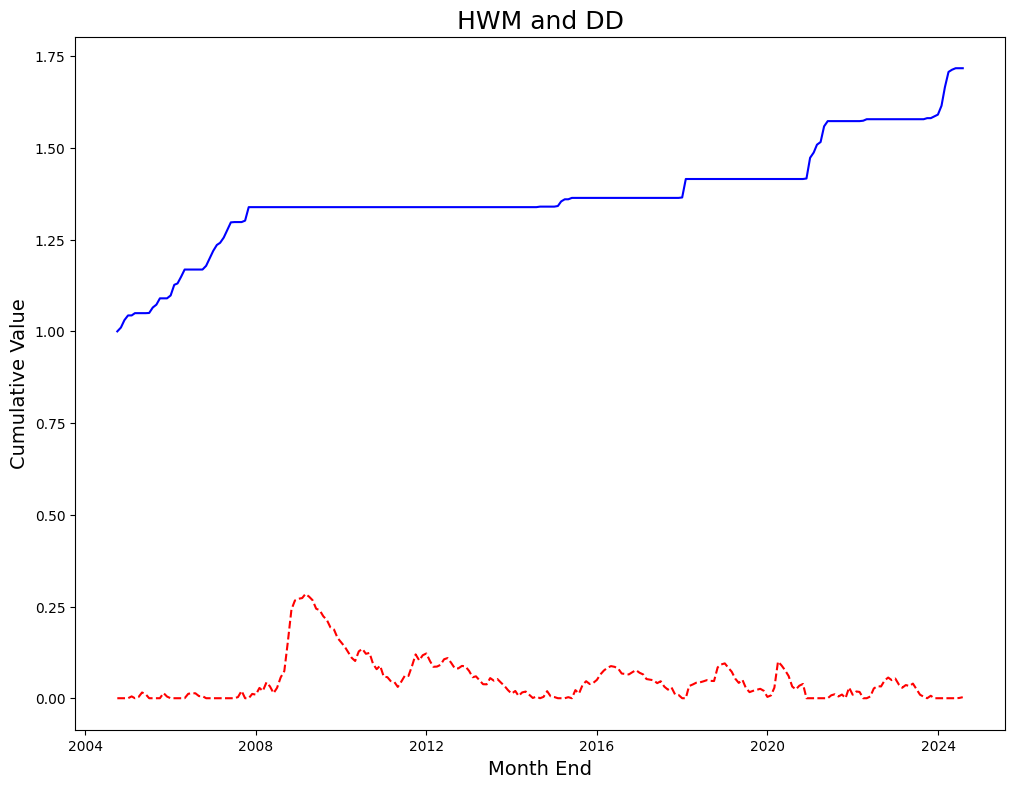

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(hf_mkt['Time'].values,hf_mkt['HWM'].values,color='blue')
plt.plot(hf_mkt['Time'].values,hf_mkt['DD'].values,color='red',linestyle='dashed')
plt.xlabel('Month End',fontsize=14)
plt.ylabel('Cumulative Value',fontsize=14)
plt.title('HWM and DD',fontsize=18)
plt.show()

# Do hedge funds hedge?
* Many hedge funds claim to “hedge,” more precisely, to be market neutral
* This is helpful because
  * It provides diversification for investors
  * Excess returns over Rf  are value-added (not just compensation for systematic risk)
  * Justifies high fees
* Do hedge funds have an incentive to hedge perfectly, i.e., choose $\beta = 0$?

# Performance Attribution
* Hedge funds frequently review what factors are driving their returns, a process called performance attribution.
* Look back over the previous quarter, say, and review
  * which trades were the main positive return contributors and which ones detracted
* This is useful both for the hedge fund's
  * communication with its clients
    * provides insight into the investment process
    * the drivers of returns
    * the risk factors to which they are exposed.
  * internal planning and evaluations
    * which investment strategies appear to be working
    * which traders tend to make successful investments




# Performance Measures and Track Records
* Should a performance measure be:
  * Adjusted for trading costs?
  * Before and after management fees?
* What is important for
  * Investors?
  * HF managers / management company?
* “Realized” performance measures:
  * Risk and expected return estimated using realized returns
  * E.g. rolling 12 month SR
* Track record = realized performance measure, after trading costs and after fees
